In [304]:
import pandas as pd
df = pd.read_csv('set.csv')


In [307]:
predict = pd.read_csv('pred.csv', encoding='latin1')
construction = pd.read_csv("constructionCost.csv")
predict =predict[["ï»¿City", "Population 2023", "Change 2020-23"]]
predict.rename(columns ={"ï»¿City":"full_state"}, inplace=True)
state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT',
    'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI',
    'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME',
    'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}
predict["State"] =predict['full_state'].map(state_abbr)
predict =predict.drop(columns=["full_state"])
construction.rename( columns = {"State": "St"}, inplace=True)
construction["State"] = construction["St"].map(state_abbr)



In [308]:
df = df[df["StartTime"]>= "2021-01-01"]
#df.sort_values("StartTime").tail(20)
df =df[['ID',"County" ,'Severity', 'Start_Lat', 'Start_Lng', 'StartTime',
       'Distance(mi)', 'DelayFromTypicalTraffic(mins)', 'Street', 'City', 
        'State', 'Country', 'ZipCode',  'Weather_Conditions']]

In [309]:

merged_df = pd.merge(df, predict, on='State', how='outer')
merged_df =pd.merge(merged_df, construction, on='State', how = 'outer')
rank = merged_df["rank1"]
merged_df = merged_df.iloc[:, :-5]
merged_df["State Construction Cost Rank"] = rank
merged_df.dropna(subset=["ID"], inplace=True)
merged_df

,ID,County,Severity,Start_Lat,Start_Lng,StartTime,Distance(mi),DelayFromTypicalTraffic(mins),Street,City,State,Country,ZipCode,Weather_Conditions,Population 2023,Change 2020-23,State Construction Cost Rank
0,C-14213642,Bossier,0.0,32.519043,-93.741096,2021-02-18T20:32:00.000-05:00,1.800000,1.0,E Texas St,Bossier City,LA,US,71111,Fair,"4,573,749",-1.80%,24.0
1,C-21478704,Natchitoches,2.0,31.883865,-93.366982,2021-02-19T21:54:00.000-05:00,7.720000,7.0,I-49 S,Robeline,LA,US,71469,NaN,"4,573,749",-1.80%,24.0
2,C-18605594,Calcasieu,1.0,30.215639,-93.371132,2021-02-16T10:40:00.000-05:00,2.550000,1.0,I-10 E,Sulphur,LA,US,70663,Fair,"4,573,749",-1.80%,24.0
3,C-25680366,Winn,1.0,31.958340,-92.799294,2021-05-18T14:58:00.000-04:00,9.320000,5.0,Highway 156,Winnfield,LA,US,71483-5058,Partly Cloudy,"4,573,749",-1.80%,24.0
4,C-30647626,Claiborne,0.0,32.810699,-93.055672,2021-02-15T16:52:00.000-05:00,1.920000,1.0,Highway 79,Homer,LA,US,71040-2016,Cloudy,"4,573,749",-1.80%,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282384,C-16159443,McKenzie,1.0,47.583801,-103.252441,2021-06-02T12:59:00.000-04:00,3.290000,2.0,Highway 85 N,Grassy Butte,ND,US,58634,NaN,"783,926",0.60%,38.0
282385,C-21052289,Benson,3.0,47.977982,-99.204224,2021-06-07T16:50:00.000-04:00,4.320000,14.0,39th St NE,Oberon,ND,US,58357-9603,Cloudy,"783,926",0.60%,38.0
282386,C-28709657,Slope,1.0,46.526161,-102.978271,2021-08-20T11:57:00.000-04:00,10.720000,6.0,61st St SW,New England,ND,US,58647,Cloudy,"783,926",0.60%,38.0
282387,C-1889340,Steele,1.0,47.441708,-97.868179,2021-11-12T07:48:00.000-05:00,16.440001,6.0,2nd St NE,Finley,ND,US,58230-9425,NaN,"783,926",0.60%,38.0


In [310]:
merged_df=merged_df.drop( columns=["ID"])


In [311]:
#https://simplemaps.com/data/us-cities.
uscities = pd.read_csv("uscities.csv")


In [312]:
import math
def truncate_to_two_digits(x):
    return float(f"{x:.1f}")


merged_df_5 = merged_df.iloc[:, 1:20]
merged_df["Start_Lat"] = merged_df["Start_Lat"].apply(truncate_to_two_digits)
merged_df["Start_Lng"] = merged_df["Start_Lng"].apply(truncate_to_two_digits)
uscities["lat"] = uscities["lat"].apply(truncate_to_two_digits)
uscities["lng"] = uscities["lng"].apply(truncate_to_two_digits)
uscities["lat"] = pd.to_numeric(uscities["lat"], errors='coerce')

def longitude_change(lat, distance):
        lat_rad = math.radians(lat)
        return distance / (69 * math.cos(lat_rad))
    
directions = {"01":"East", "0-1":"West", "10":"North", "-10":"South"}
def four_directions(x, y, data):
    lat =  data["Distance(mi)"]/69
    data[directions.get(str(x)+str(y))+" Lat"] = data["Start_Lat"]+  x*lat
    data[directions.get(str(x)+str(y))+" Lat"]=data[directions.get(str(x)+str(y))+" Lat"].apply(truncate_to_two_digits)
    data[directions.get(str(x)+str(y))+" Lng"] = data.apply(lambda row: row["Start_Lng"] + longitude_change(row["Start_Lat"], row["Distance(mi)"]), axis=1)
    data[directions.get(str(x)+str(y))+" Lng"] = data[directions.get(str(x)+str(y))+" Lng"].apply(truncate_to_two_digits)


four_directions(1, 0, merged_df)
four_directions(0, 1, merged_df)
four_directions(0, -1, merged_df)
four_directions(-1, 0, merged_df)





In [314]:
import numpy as np
def truncate_to_zero_digits(x):
    return float(f"{x:.0f}")
uscities["Lat_Lng"]= uscities["lat"].astype(str)+' '+uscities["lng"].astype(str)

def map_to_cities(merged_df, lat, long, direction):
    merged_df["Lat_Lng"] = merged_df[lat].astype(str) + ' ' + merged_df[long].astype(str)
    city_map = dict(zip(uscities["Lat_Lng"], uscities["city"]))
    state_map = dict(zip(uscities["Lat_Lng"], uscities["state_id"]))
    merged_df['Dest City ' + direction] = merged_df["Lat_Lng"].map(city_map)
    merged_df['Dest City ' + direction] = merged_df['Dest City ' + direction].fillna(np.nan)
    merged_df['Dest State ' + direction] = merged_df["Lat_Lng"].map(state_map)
    merged_df['Dest State ' + direction] = merged_df['Dest State ' + direction].fillna(np.nan)


map_to_cities(merged_df, "North Lat", "North Lng", "N")
map_to_cities(merged_df, "West Lat", "West Lng", "W")
map_to_cities(merged_df, "East Lat", "East Lng", "E")
map_to_cities(merged_df, "South Lat", "South Lng", "S")


In [315]:
merged_df.drop(columns=["Distance(mi)", "DelayFromTypicalTraffic(mins)", "Lat_Lng", 'Country',
                         'StartTime', 'Street','Weather_Conditions', 'Population 2023'], inplace =True)

In [316]:
merged_df.rename(columns={
                          'Start_Lng':'Start Lng',
                          'Start_Lat':'Start Lat'}, inplace=True)

In [317]:
merged_df["Change 2020-23"]=merged_df["Change 2020-23"].str[:-1]

In [318]:
merged_df=merged_df.reindex(columns=['City', 'County', 'State', 'ZipCode', 'Start Lat', 'Start Lng',
    'North Lat', 'North Lng', 'East Lat', 'East Lng', 'West Lat',
       'West Lng', 'South Lat', 'South Lng', 'Dest City N', 'Dest State N',
       'Dest City W', 'Dest State W', 'Dest City E', 'Dest State E',
       'Dest City S', 'Dest State S', 'Severity', 'Change 2020-23', 'State Construction Cost Rank'])

In [319]:
merged_df =merged_df[~(merged_df["Severity"]==0)]

In [329]:
merged_df['State Construction Cost Rank'].nunique()

49

In [320]:
merged_df['State Construction Cost Rank'] = merged_df['State Construction Cost Rank'].fillna(3)


In [321]:
merged_df=merged_df.dropna(subset="City")

In [322]:
pattern  = pattern = r'^Islamorada.*' 
filtered_df = merged_df[merged_df['City'].str.contains(pattern, regex=True)]
merged_df.loc[merged_df["Dest City W"]=="Islamorada, Village of Islands", "Dest City W"]="Islamorada"
merged_df.loc[merged_df["Dest City E"]=="Islamorada, Village of Islands", "Dest City E"]="Islamorada"
merged_df.loc[merged_df["Dest City N"]=="Islamorada, Village of Islands", "Dest City N"]="Islamorada"
merged_df.loc[merged_df["Dest City S"]=="Islamorada, Village of Islands", "Dest City S"]="Islamorada"

In [323]:
filtered_df = merged_df[merged_df['City'].str.contains(pattern, regex=True)]


In [324]:
merged_df.loc[merged_df['Change 2020-23'].isna(), 'Change 2020-23']=1.2

In [80]:
merged_df = merged_df['ID', 'County', 'Severity', 'Start_Lat', 'Start_Lng', 'StartTime',
       'Distance(mi)', 'DelayFromTypicalTraffic(mins)', 'Street', 'City',
       'State', 'Country', 'ZipCode', 'Weather_Conditions',
       'Population Change %', 'Change 2020-23',
       'Highway Construction Costs Rank']


KeyError: ('ID', 'County', 'Severity', 'Start_Lat', 'Start_Lng', 'StartTime', 'Distance(mi)', 'DelayFromTypicalTraffic(mins)', 'Street', 'City', 'State', 'Country', 'ZipCode', 'Weather_Conditions', 'Population Change %', 'Change 2020-23', 'Highway Construction Costs Rank')

In [327]:
merged_df.to_csv("data.csv")


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(0.0, 30000.0)

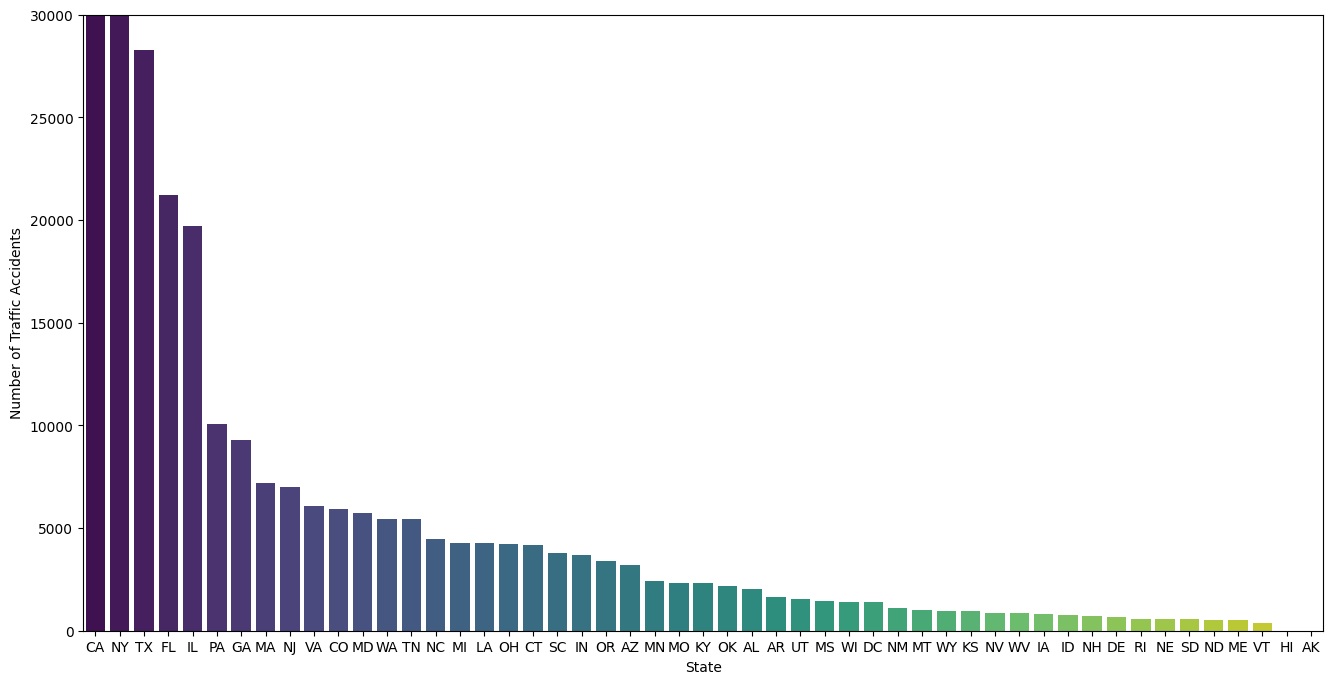

In [ ]:
groupped = merged_df.groupby(["County","State","Street"]).size().reset_index(name =
         "Number of Traffic Accidents").sort_values(by="Number of Traffic Accidents", ascending=False)
import matplotlib.pyplot as plt

groupped["County"].nunique()
county_totals = merged_df.groupby("State").size().reset_index(name='Number of Traffic Accidents')
county_totals = county_totals.sort_values(by='Number of Traffic Accidents', ascending=False)
plt.figure(figsize=(16, 8))

import seaborn as sns
sns.barplot(data=county_totals, x='State', y='Number of Traffic Accidents', palette='viridis')
plt.ylim(0, 30000)